# Olivetti Faces: Principal Component Analysis (PCA) for Image Data

In this project, we explore the powerful dimensionality reduction technique **Principal Component Analysis (PCA)** using the **Olivetti Faces Dataset**, a collection of grayscale face images. PCA is a statistical method that transforms high-dimensional data into a smaller set of principal components while retaining as much variance (information) as possible. This project demonstrates the ability of PCA to compress and reconstruct image data, offering insights into its mechanisms and practical applications.

---

## Motivation  
High-dimensional datasets, such as images, are computationally expensive to process and analyze. Each image in the dataset can be represented as a vector of pixel intensities, resulting in thousands of features per image. This dimensionality makes tasks like visualization, analysis, and storage challenging.  

**Principal Component Analysis (PCA)** addresses this challenge by reducing the dimensionality of the data while preserving its essential features. By transforming images into a smaller number of principal components, PCA simplifies the dataset without significant loss of information.

---

## Objectives  
1. **Visualize the Olivetti Faces Dataset**: Display the original face images to understand the structure and scale of the data.  
2. **Standardize the Data**: Preprocess the images by standardizing pixel intensities to ensure consistent scaling.  
3. **Apply PCA**: Perform PCA to identify the principal components (eigenvectors), known as **eigenfaces**.  
4. **Visualize Eigenfaces**: Display the eigenfaces to interpret their role as building blocks of facial images.  
5. **Reconstruct Images**: Reconstruct images using a reduced set of principal components to demonstrate PCA's ability to retain key features while reducing dimensionality.  

---

## Significance  
This project provides an intuitive understanding of how PCA works in the context of image data. By visualizing **eigenfaces** and observing **reconstructed images**, we gain insights into how PCA identifies and prioritizes the most important features of the dataset. This process not only reduces computational complexity but also reveals the underlying structure of the data.  

The techniques explored in this project have real-world applications in:  
- **Image Compression**  
- **Facial Recognition Systems**  
- **Feature Extraction for Machine Learning Models**  

---

## Tools & Libraries  
- **Python**: Programming language for data analysis and visualization.  
- **scikit-learn**: For implementing PCA and accessing the Olivetti Faces Dataset.  
- **matplotlib**: For visualizing images and results.  
- **NumPy**: For numerical operations and data manipulation.  

---

## Outcomes  
By the end of this project, we will demonstrate how PCA effectively reduces dimensionality and reconstructs image data. This approach highlights PCA's role in data compression and feature extraction, offering a practical solution for high-dimensional datasets.


## PART I - Data Standarization

In [6]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
 
 
# Download the data from sklearn's datasets
faces = datasets.fetch_olivetti_faces()['data']

In [7]:
# 1. Standardize the images using the mean and standard deviation
faces_mean = faces.mean(axis=0)
faces_std = faces.std(axis=0)
faces_standardized = (faces - faces_mean) / faces_std

In [8]:
# 2. Find the side length of a square image
n_images, n_features = faces_standardized.shape
side_length = int((n_features)**0.5)
print(f'Number of features(pixels) per image: {n_features}')
print(f'Square image side length: {side_length}')

Number of features(pixels) per image: 4096
Square image side length: 64


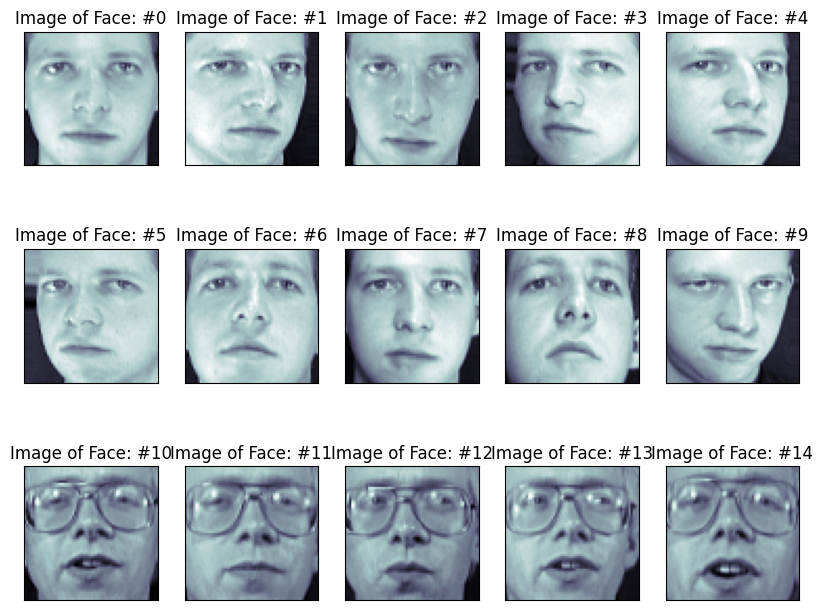

In [9]:
# 3. Visualize the first 15 images
# Create an empty 10x8 plot
fig = plt.figure(figsize=(10, 8))

# Observe the first 15 images.
for i in range(15):

    # Create subplot, remove x and y ticks, and add title
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.set_title(f'Image of Face: #{i}')

    # Get an image from a row based on the current value of i
    #face_image = faces_standardized[i]
    face_image = faces[i]

    # Reshape this image into side_length x side_length 
    face_image_reshaped = face_image.reshape(side_length, side_length)

    # Show the image
    ax.imshow(face_image_reshaped, cmap=plt.cm.bone)
plt.show()

## Part II - Dimensionality Reduction with PCA

In [10]:
import pandas as pd
from sklearn.decomposition import PCA

# 1. Instantiate a PCA object and fit the standardized faces dataset
pca = PCA(n_components=400) 
pca.fit(faces_standardized)

PCA(n_components=400)

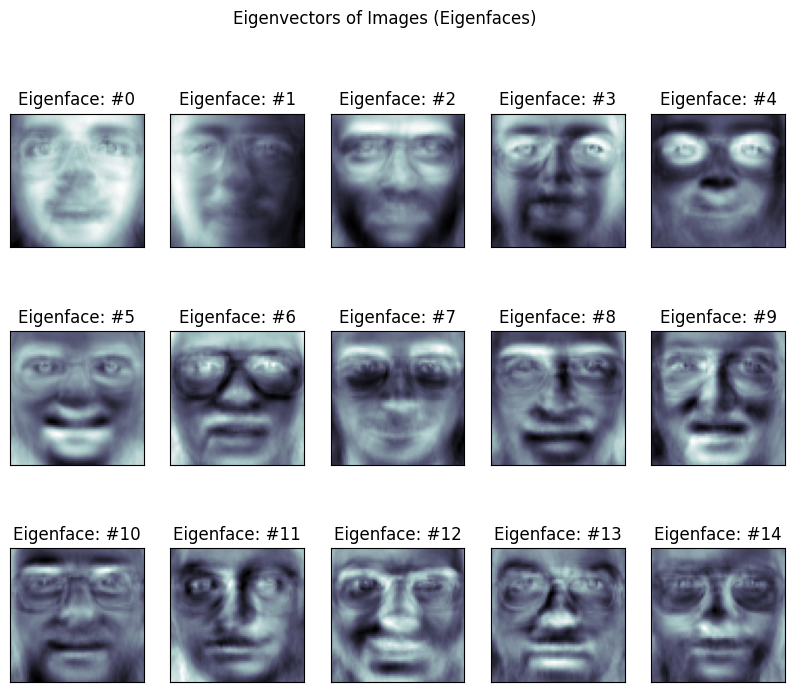

In [11]:
# 2. Retrieve and plot eigenvectors (eigenfaces)
eigenfaces = pca.components_ 

fig = plt.figure(figsize=(10, 8))
fig.suptitle('Eigenvectors of Images (Eigenfaces)')
for i in range(15):
    # Create subplot, remove x and y ticks, and add title
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.set_title(f'Eigenface: #{i}')
    
    # Get an eigenvector from the current value of i
    eigenface = eigenfaces[i]

    # Reshape this image into 64x64 since the flattened shape was 4096
    eigenface_reshaped = eigenface.reshape(64, 64)

    # Show the image
    ax.imshow(eigenface_reshaped, cmap=plt.cm.bone)
plt.show()

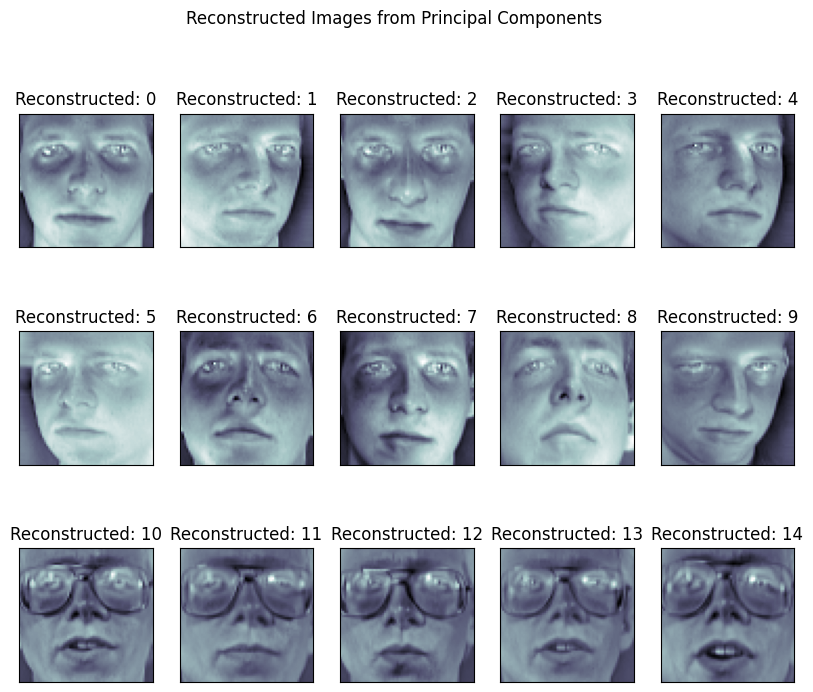

In [12]:
# 3. Reconstruct images from the compressed principal components
# The principal components are usually calculated using `faces_standardized @ principal_axes` or the `.transform` method
principal_components = pca.transform(faces_standardized) 

# The `inverse_transform` method allows for reconstruction of images in the original size
faces_reconstructed = pca.inverse_transform(principal_components)

# Plot the reconstructed images 
fig = plt.figure(figsize=(10, 8))
fig.suptitle('Reconstructed Images from Principal Components')
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.set_title(f'Reconstructed: {i}')

    reconstructed_face = faces_reconstructed[i]
    reconstructed_face_reshaped = reconstructed_face.reshape(64, 64)
    ax.imshow(reconstructed_face_reshaped, cmap=plt.cm.bone)
plt.show()